<a href="https://colab.research.google.com/github/ankitgulshan24/vitalEase/blob/main/Train_plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Plant_Disease_Dataset/Plant_Disease_Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,   # for test data you usually keep shuffle=False
    seed=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 1672 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Plant_Disease_Dataset/Plant_Disease_Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,   # keep shuffle=True for validation during training
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 840 files belonging to 38 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [15]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

NameError: name 'training_set' is not defined

In [17]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Plant_Disease_Dataset/Plant_Disease_Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1672 files belonging to 38 classes.


In [18]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=5)

Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 431s 8s/step - accuracy: 0.0211 - loss: 3.7264 - val_accuracy: 0.0452 - val_loss: 3.5934
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 145ms/step - accuracy: 0.0493 - loss: 3.5360 - val_accuracy: 0.1440 - val_loss: 3.2166
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.1157 - loss: 3.1961 - val_accuracy: 0.1750 - val_loss: 2.8746
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.1877 - loss: 2.8796 - val_accuracy: 0.2738 - val_loss: 2.5542
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.2467 - loss: 2.5633 - val_accuracy: 0.3298 - val_loss: 2.3176


**Evaluating Model**

In [19]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.3890 - loss: 2.0853
Training accuracy: 0.4180622100830078


In [20]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.3121 - loss: 2.3629
Validation accuracy: 0.32976189255714417


In [21]:
cnn.save("/content/drive/MyDrive/Colab Notebooks/trained_plant_disease_model.keras")

In [22]:
training_history.history #Return Dictionary of history

{'accuracy': [0.025717703625559807,
  0.06638755649328232,
  0.12559808790683746,
  0.21411482989788055,
  0.26614832878112793],
 'loss': [3.664910316467285,
  3.4594502449035645,
  3.1104307174682617,
  2.7496440410614014,
  2.493535041809082],
 'val_accuracy': [0.04523809626698494,
  0.14404761791229248,
  0.17499999701976776,
  0.2738095223903656,
  0.32976189255714417],
 'val_loss': [3.5933876037597656,
  3.216557741165161,
  2.8746426105499268,
  2.5542140007019043,
  2.3176259994506836]}

In [23]:
import json
with open('/content/drive/MyDrive/training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [24]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


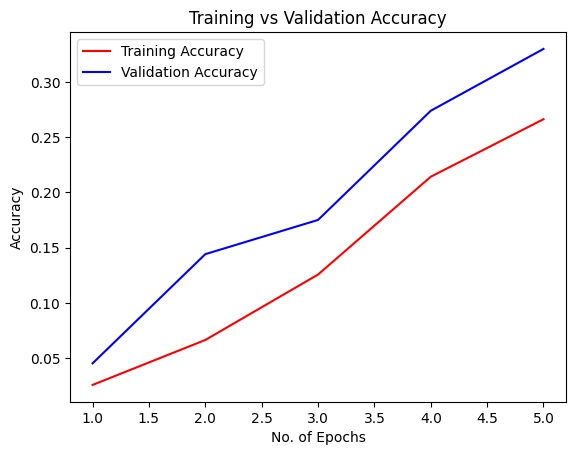

In [25]:
epochs = range(1, len(training_history.history['accuracy']) + 1)

plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

**other metrics for model **

In [26]:
class_name = validation_set.class_names

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Plant_Disease_Dataset/Plant_Disease_Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,   # keep False for evaluation/prediction
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 840 files belonging to 38 classes.


In [27]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step


In [28]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [29]:
Y_true

<tf.Tensor: shape=(1672,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_true, predicted_categories)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(Y_true, predicted_categories, target_names=class_name)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[21  1  1 ...  0  1  0]
 [ 2 18  0 ...  0  2  1]
 [ 0  0 13 ...  5  0  0]
 ...
 [ 0  0  0 ... 24  2  0]
 [ 0  0  0 ...  0 32  0]
 [ 0  0  0 ...  0  0 23]]

Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.35      0.48      0.40        44
                                 Apple___Black_rot       0.46      0.41      0.43        44
                          Apple___Cedar_apple_rust       0.35      0.30      0.32        44
                                   Apple___healthy       0.50      0.02      0.04        44
                               Blueberry___healthy       0.59      0.23      0.33        44
          Cherry_(including_sour)___Powdery_mildew       0.57      0.09      0.16        44
                 Cherry_(including_sour)___healthy       0.60      0.48      0.53        44
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.51    